<a href="https://colab.research.google.com/github/tmoore-byte/SomeProjects/blob/main/Alhambra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1> Alhambra Varsity Analytics Vol 1

Goal:
* create a weighted value bases on key values to determine a statistically "ideal" lineup



1. nan nan - Weighted Average: 62.106
2. Daniel Polasek - Weighted Average: 10.211
3. Jaden Martinez - Weighted Average: 6.234
4. Jack Miller - Weighted Average: 5.822
5. Nick George - Weighted Average: 5.804
6. Jaden Lack - Weighted Average: 5.567
7. Dominick Azevedo - Weighted Average: 5.082
8. Jake Alderman - Weighted Average: 5.074
9. John Davidson - Weighted Average: 4.927
Bench 1. Lucas Pieper - Weighted Average: 3.327
Bench 2. Nathan Liddicoat - Weighted Average: 2.909
Bench 3. Omar Martinez - Weighted Average: 2.766


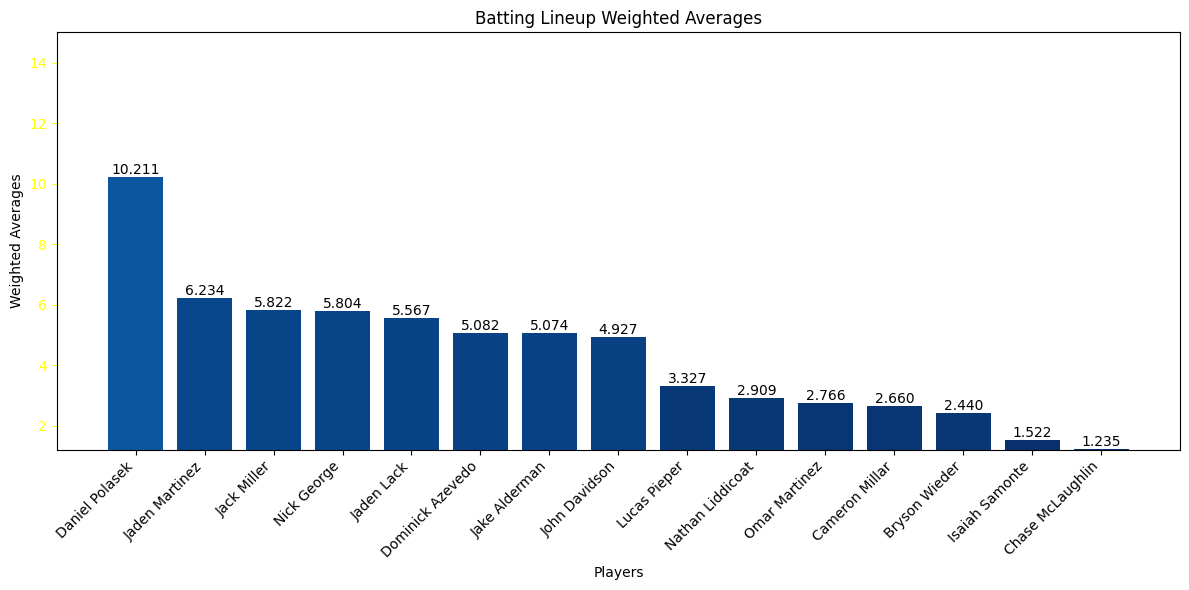

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
url = "https://raw.githubusercontent.com/tmoore-byte/SomeProjects/main/Batting_Clean.csv"
data = pd.read_csv(url)

# Filter the data to include players with at least 10 games played
filtered_data = data[data['GP'] >= 10]

# Define the weights for each statistic
weights = {
    'AVG': 0.3,
    'OBP': 0.3,
    'SLG': 0.3,
    'OPS': 0.3,
    'HR': 0.2,
    'RBI': 0.2,
    'QAB': 0.2
}

def calculate_weights(data):
    weighted_data = []
    for _, player in data.iterrows():
        weighted_average = sum(float(player[col]) * weights[col] for col in weights)
        weighted_data.append((player['First'], player['Last'], weighted_average))
    return sorted(weighted_data, key=lambda x: x[2], reverse=True)

def create_batting_lineup(weighted_data):
    lineup = []
    for i in range(1, 10):
        player = weighted_data[i-1]
        lineup.append(f"{i}. {player[0]} {player[1]}")
        print(f"{i}. {player[0]} {player[1]} - Weighted Average: {player[2]:.3f}")
    return lineup

def create_bench(weighted_data):
    bench = []
    for i in range(10, 13):
        player = weighted_data[i-1]
        bench.append(f"Bench {i-9}. {player[0]} {player[1]}")
        print(f"Bench {i-9}. {player[0]} {player[1]} - Weighted Average: {player[2]:.3f}")
    return bench

# Calculate weights and create batting lineup and bench
weighted_data = calculate_weights(filtered_data)
batting_lineup = create_batting_lineup(weighted_data)
bench = create_bench(weighted_data)

# Create a bar graph visualization of the weighted averages
players = [f"{player[0]} {player[1]}" if isinstance(player[0], str) and isinstance(player[1], str)
           else f"Player {i+1}" for i, player in enumerate(weighted_data)]
averages = np.array([player[2] for player in weighted_data])  # Convert to NumPy array

# Set color range for heatmap
color_range = [min(averages), max(averages)]

plt.figure(figsize=(12, 6))  # Adjust the figure size for a larger graph

# Create the bar graph with heatmap colors
bars = plt.bar(players[1:], averages[1:], color=plt.cm.Blues_r((averages[1:] - color_range[0]) / (color_range[1] - color_range[0])))

# Add the actual value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.3f}", ha='center', va='bottom', color='black')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Players")
plt.ylabel("Weighted Averages")
plt.title("Batting Lineup Weighted Averages")

# Adjust y-axis limits for better fit
plt.ylim(min(averages) - 0.02, 15)

# Set yellow color for y-axis labels
plt.tick_params(axis='y', colors='yellow')

# Set black outline for the bars
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')

plt.tight_layout()
plt.show()


The weighted average represents a combined score that takes into account different statistics for each player. In this case, the weighted average is calculated based on the following statistics:

- **AVG** (Batting Average)
- **OBP** (On-Base Percentage)
- **SLG** (Slugging Percentage): The player's slugging percentage represents the average number of bases they earn per at-bat.
- **OPS** (On-Base Plus Slugging): OPS is the sum of OBP and SLG and provides a combined measure of a player's ability to both get on base and hit for power.
- **HR** (Home Runs): The total number of home runs hit by the player.
- **RBI** (Runs Batted In)
- **QAB** (Quality At-Bat)




Each statistic is assigned a weight, which determines its contribution to the weighted average. The weights are set based on their relative importance in evaluating a player's performance. By multiplying each statistic value by its corresponding weight and summing them up, we obtain the weighted average score for each player. The higher the weighted average, the better the player's overall performance based on the chosen statistics and weights.







